# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [2]:
USER_NAME = u"Капитонов".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [130]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, debug=False, n_batch = 10):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        debug - вывод промежуточных результатов
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.debug = debug
        self.n_batch = n_batch
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        parametr  = 0.01
        X = (X - X.mean(axis=0))/X.std(axis=0)
        X = np.c_[np.ones(X.shape[0]), X]
        self.Beta = np.random.uniform(-1./X.shape[1],1./X.shape[1],X.shape[1])
        batch_size = X.shape[0]/ self.n_batch
        self.Q = np.sum(self.sigmoid(np.matmul(X,self.Beta)*y))     
        self.loss = self.Q
        for i in xrange(self.max_epoch):        
            
            mini_batch = random.sample(range(X.shape[0]), batch_size)
            error = np.sum(self.sigmoid(np.matmul(X[mini_batch],self.Beta)*y[mini_batch]))
            self.Beta = self.Beta*(1 - self.alpha*self.C)
            self.Beta -= (self.alpha/batch_size)*np.sum(X[mini_batch].T*y[mini_batch]*self.sigmoid(np.matmul(X[mini_batch],self.Beta)*y[mini_batch]),axis=1).T

            self.Q = (1-parametr)*self.Q+parametr*error
            self.loss = np.append(self.loss,self.Q)
        
        return self
    
    def partial_fit(self, X, y=None):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        '''
        Возвращение метки класса
        '''
        y_hat = np.c_[np.ones(X.shape[0]), X].dot(self.Beta)
        
        return (lambda x: np.sign(x))(y_hat)
    
    def predict_proba(self, X):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        '''
        Возвращение вероятности каждого из классов
        '''
        y_hat = np.c_[np.ones(X.shape[0]), X].dot(self.Beta)
        
        return (lambda x: self.sigmoid(x))(y_hat)
    
    def sigmoid(self, z):
        return 1. /(1 + np.exp(-z))

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

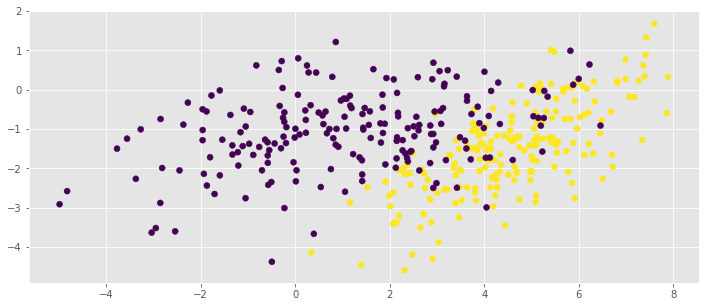

In [141]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), -np.ones(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [146]:
model = MySGDClassifier(debug=False,n_batch=100, max_epoch=10000)
model.fit(X, y)
#print model.predict_proba(X)

MySGDClassifier(C=1, alpha=0.01, debug=False, max_epoch=10000, n_batch=100)

In [143]:
y_pred = model.predict(X)
# print model.Beta
# print y_pred
# y_ver = model.predict_proba(X)
# print y_ver

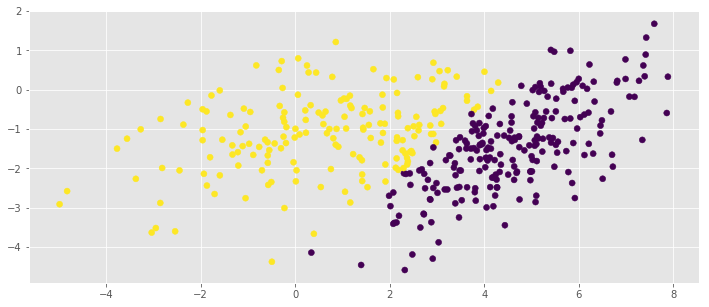

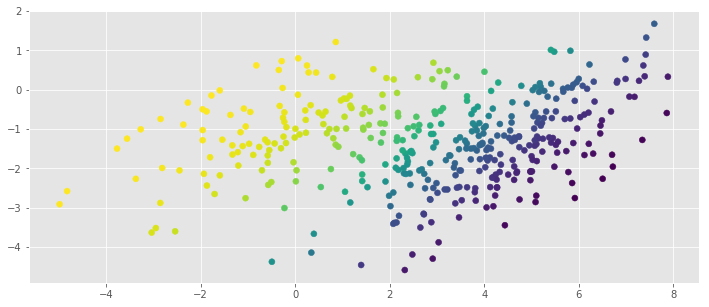

In [144]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_ver)

## Анализ сходимости (2 балл)

Q, значение функции потерь:  1.54112600814
10000 10001


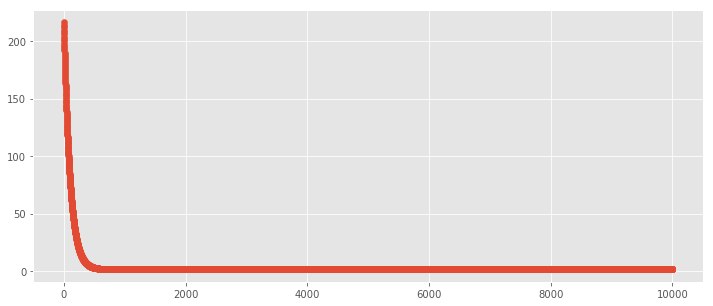

In [145]:
print "Q, значение функции потерь: ",model.Q
plt.scatter(range(0,model.max_epoch+1),model.loss)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

Q, значение функции потерь:  1.47127204412
Q, значение функции потерь:  1.51303387609
Q, значение функции потерь:  1.5238020495
Q, значение функции потерь:  1.53165164704
Q, значение функции потерь:  1.51739231508
Q, значение функции потерь:  1.46707929098
Q, значение функции потерь:  1.52641624144
Q, значение функции потерь:  1.538860598
Q, значение функции потерь:  1.48177619026
Q, значение функции потерь:  1.50849746018


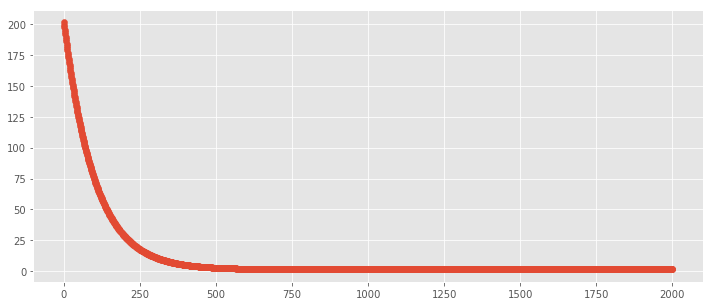

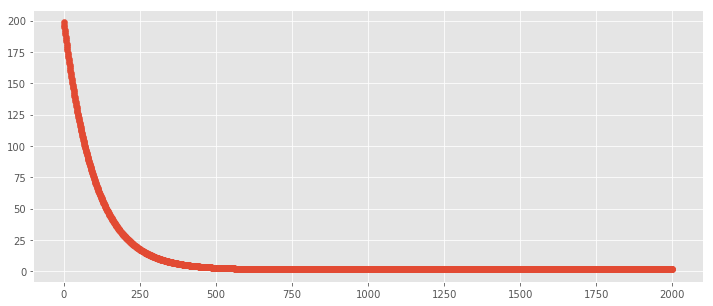

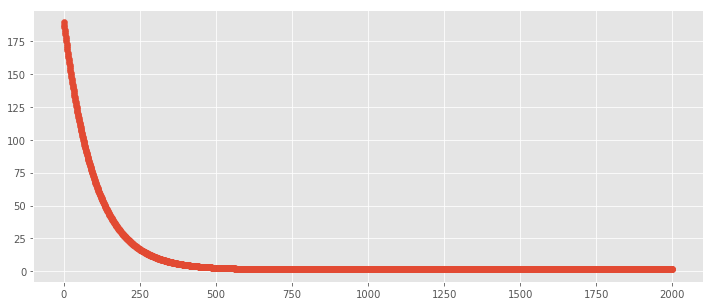

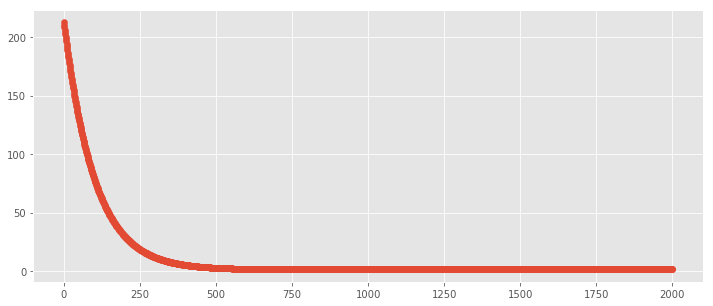

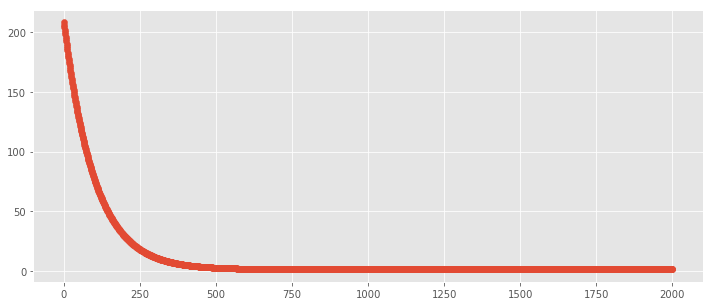

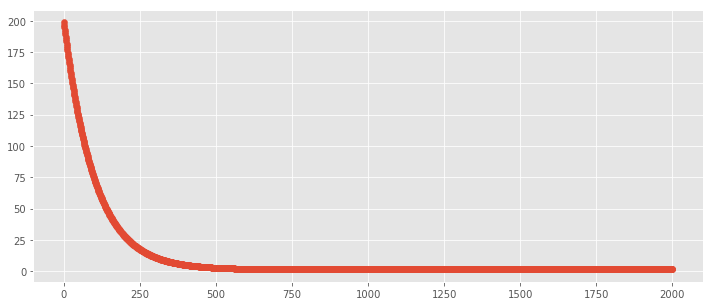

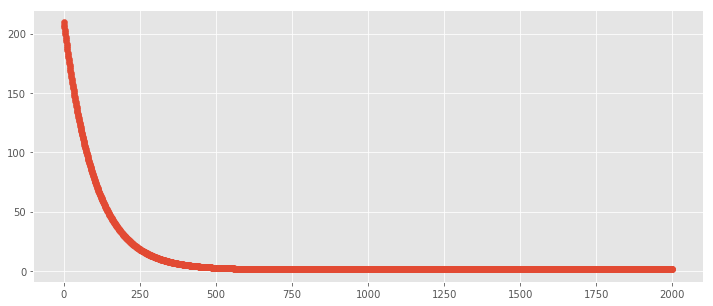

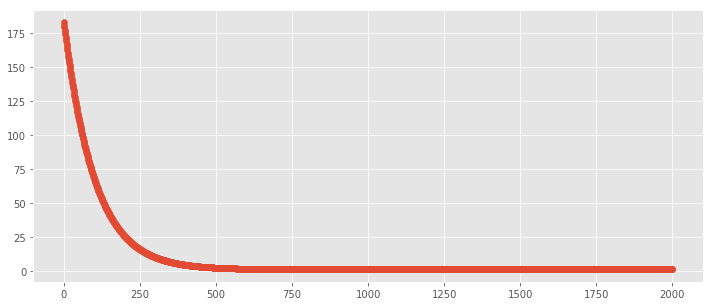

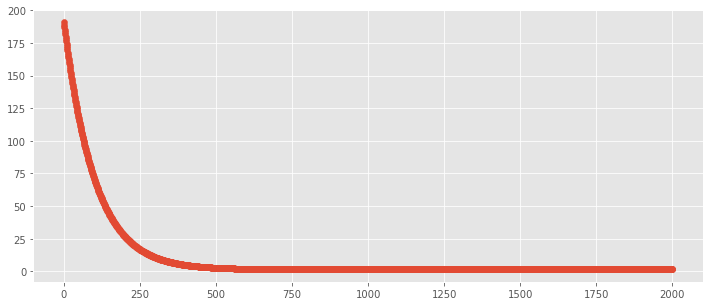

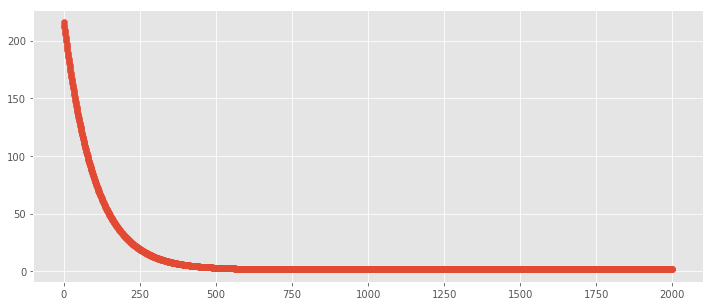

In [149]:
for i in xrange(1,11):
    plt.figure()
    model = MySGDClassifier(debug=False,n_batch=100, max_epoch=2000, alpha=0.1/i)
    model.fit(X, y)
    print "Q, значение функции потерь: ",model.Q
    plt.scatter(range(0,model.max_epoch+1),model.loss)

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [168]:
# Загрузка данных целиком
df_list = []
for chunk in range(1,5):
    filepath = './trainingData_tabular_chunk%d.csv' % chunk
    df_list.append(pd.read_csv(filepath, sep=','))

df_data = pd.concat(df_list)

# Загрузка одной части данных
# filepath = './trainingData_tabular_chunk1.csv'
# df_data = pd.read_csv(filepath, sep=',')

In [169]:
df_data.shape

(2000000, 45)

In [170]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [171]:
df_data.head().T

gamestate_id,4687346.0,3270826.0,3189487.0,4098946.0,2661127.0
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [172]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.5047995

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [173]:
df_pc = pd.get_dummies(df_data.player_hero_card_id, prefix='pc_')
df_oc = pd.get_dummies(df_data.opponent_hero_card_id, prefix='oc_')

In [174]:
df_data = pd.concat([df_data, df_pc, df_oc], axis = 1)

In [175]:
df_data.head().T

gamestate_id,4687346.0,3270826.0,3189487.0,4098946.0,2661127.0
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [176]:
del df_data['player_hero_card_id']
del df_data['opponent_hero_card_id']

In [177]:
df_data.head().T

gamestate_id,4687346.0,3270826.0,3189487.0,4098946.0,2661127.0
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1
opponent_deck_count,11,19,22,17,12


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [178]:
print df_data.shape
y_tr = df_data.decision.values
y_tr[y_tr == 0] = -1
X_tr = df_data.values[:, 2:]

(2000000, 60)


In [179]:
X_tr

array([[ 0,  0,  5, ...,  1,  0,  0],
       [ 0,  0, 22, ...,  0,  0,  0],
       [ 3,  0, 29, ...,  0,  0,  0],
       ..., 
       [ 0,  0, 30, ...,  0,  1,  0],
       [ 3,  0, 24, ...,  0,  0,  0],
       [ 0,  0, 27, ...,  1,  0,  0]])

In [181]:
model = MySGDClassifier(debug=False,n_batch=100000, max_epoch=1000)
model.fit(X_tr, y_tr)

MySGDClassifier(C=1, alpha=0.01, debug=False, max_epoch=1000, n_batch=100000)

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [212]:
df_test = pd.read_csv('testData_tabular.csv', sep=',')

In [213]:
df_test.head().T

,0,1,2,3,4
gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent.armor,0.0,0.0,0.0,0.0,0.0
opponent.attack,0.0,0.0,0.0,0.0,0.0
opponent.hero_card_id,798.0,326.0,390.0,798.0,326.0
opponent.hp,29.0,12.0,12.0,30.0,30.0
opponent.special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent.weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent.crystals_all,10.0,5.0,10.0,6.0,8.0


In [214]:
df_test.columns = df_test.columns.str.replace('.', '_')
df_test = df_test.set_index('gamestate_id')
df_pc = pd.get_dummies(df_test.player_hero_card_id, prefix='pc_')
df_oc = pd.get_dummies(df_test.opponent_hero_card_id, prefix='oc_')
df_test = pd.concat([df_test, df_pc, df_oc], axis = 1)
del df_test['player_hero_card_id']
del df_test['opponent_hero_card_id']
X_test = df_test.values[:, 2:]

In [202]:
df_test.head().T

,0,1,2,3,4
gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hp,29.0,12.0,12.0,30.0,30.0
opponent_special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,5.0,10.0,6.0,8.0
opponent_crystals_current,8.0,5.0,0.0,6.0,2.0


In [215]:
y_pred = model.predict_proba(X_test)

In [216]:
np.set_printoptions(suppress=True)

In [218]:
np.savetxt('test.txt', y_pred, delimiter=',',fmt="%10.8f")